In [2]:
#La Potencia viene dada por la siguiente formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

Dónde:

P es la potencia necesaria

$\rho$ es la densidad del aire

V es la velocidad

wV es velocidad el viento

Cd es el coeficiente de drag

A es el área efectiva

Cr es el coeficiente de rozamiento

$\%$ es la pendiente

m es la masa total del conjunto bicicleta - ciclista

In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn')
import numpy as np


### Cargamos los datos

In [23]:
path = '../Entrenamientos/result_tramos.xlsx'

In [24]:
df = pd.read_excel(path)

In [27]:
df = df[df["sp_vel_aparente"]!=-np.inf]

In [28]:
df.describe()

,tramo,tramo_inicial,tramo_final,sp_pwd,tiempo_tramo,distancia_tramo,vel_calc,sp_vel_aparente,porcent_des
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,37.480000,4423.960000,4524.800000,146.697211,230.786667,1404.350534,27.268971,-1.000097,0.024593
std,22.231193,2557.723182,2529.893951,66.803668,497.567768,2419.973943,8.964338,6.867127,2.433537
min,0.000000,0.000000,65.000000,0.000000,2.000000,11.000000,0.770052,-9.859221,-6.677410
25%,18.500000,1297.500000,1654.000000,88.168538,21.500000,112.189268,21.643902,-7.377288,-0.957365
50%,37.000000,5927.000000,5935.000000,157.112154,70.000000,478.200000,27.282754,-2.994640,-0.030749
75%,56.500000,6590.500000,6591.500000,202.654265,142.000000,890.626216,32.798548,5.298305,1.014067
max,75.000000,7478.000000,7564.000000,255.381555,2761.000000,10273.070042,50.116364,18.939865,7.137195


In [29]:
df.head()

,tramo,tramo_inicial,tramo_final,sp_pwd,tiempo_tramo,distancia_tramo,vel_calc,sp_vel_aparente,porcent_des
0,0,0,65,77.836186,106,966.000000,32.807547,8.396543,-3.377386
1,1,65,432,255.381555,980,4819.000000,17.702449,5.337415,4.181100
2,2,432,468,152.194252,44,473.935824,38.776567,8.311220,-1.737873
3,3,468,532,248.770434,120,813.223602,24.396708,8.704791,2.662585
4,4,532,548,155.753257,21,206.720563,35.437811,8.487546,-0.873144


In [30]:
df.columns = ['tramo', 'tramo_inicial', 'tramo_final', 'pwr', 'tiempo_tramo', 'distancia_tramo', 'spd', 'viento_aparente', 'porc']

In [31]:
# Hacemos que la target sea el pwr solo por ver como funciona el modelo. Luego habrá que despejar y calcular spd

In [32]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
df_lm = df[['pwr','spd','porc','viento_aparente']]

In [34]:
train = round(len(df_lm)*0.7)
train
test = len(df_lm)-train
test

23

In [35]:
df_lm_x = df[['spd','porc','viento_aparente']]
df_lm_y = df[['pwr']]

In [36]:
X_train = df_lm_x[:train]
X_test = df_lm_x[test:]

In [37]:
Y_train = df_lm_y[:train]
Y_test = df_lm_y[test:]

In [38]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Make predictions using the testing set
Y_pred = regr.predict(X_test)

In [40]:
X_test.describe()

,spd,porc,viento_aparente
count,52.000000,52.000000,52.000000
mean,27.220228,-0.083624,-2.871679
std,9.380595,2.263064,6.662942
min,0.770052,-6.498721,-9.859221
25%,22.509603,-0.875134,-8.214425
50%,27.979319,-0.006240,-4.627340
75%,32.832517,0.630212,-0.057640
max,50.116364,6.468743,18.939865


In [41]:
Y_test.describe()

,pwr
count,52.000000
mean,148.025924
std,60.331670
min,34.108079
25%,93.482259
50%,162.082171
75%,200.002527
max,254.907662


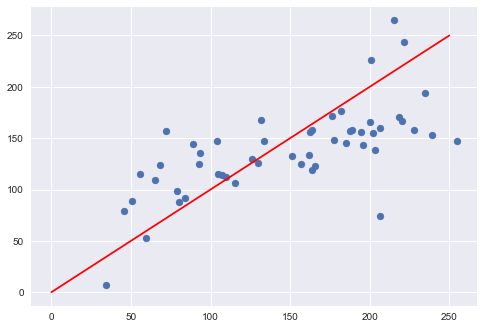

In [44]:
plt.scatter(Y_test, Y_pred)
plt.plot( [0,250],[0,250], c="red" )


Coefficients: 
 [[  2.10840121  22.44206633   1.38354303]]
Mean squared error: 2024.48
Variance score: 0.43


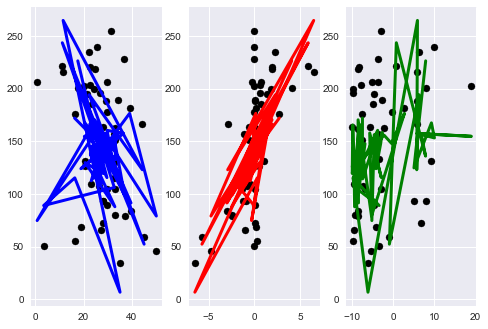

In [45]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.subplot(131)
plt.scatter(X_test['spd'], Y_test,  color='black')
plt.plot(X_test['spd'], Y_pred, color='blue', linewidth=3)
plt.grid(True)

plt.subplot(132)
plt.scatter(X_test['porc'], Y_test,  color='black')
plt.plot(X_test['porc'], Y_pred, color='red', linewidth=3)
plt.grid(True)

plt.subplot(133)
plt.scatter(X_test['viento_aparente'], Y_test,  color='black')
plt.plot(X_test['viento_aparente'], Y_pred, color='green', linewidth=3)
plt.grid(True)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [46]:
#Probamos otra cosa. Vamos a darle al modelo calculados los terminos de la formula

$P = \frac{\rho}{2}(V+wV)^2VCdA+(Cr+\%)mgV$

$P = \frac{\rho}{2}(V+wV)^2VCdA+CrmgV+\%mgV$

In [47]:
#añadimos aqui
#df_lm_x = df[['spd','porc','viento_aparente']]
#df_lm_y = df[['pwr']]

df_lm_x['termino_cda'] = (df_lm_x['spd']+df_lm_x['viento_aparente'])**2*df_lm_x['spd']
df_lm_x['termino_roz'] = df_lm_x['spd']*90
df_lm_x['termino_cte'] = df_lm_x['spd']*df_lm_x['porc']*90

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [48]:
df_lm_x.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,27.268971,0.024593,-1.000097,26559.366954,2454.207418,-1338.390862
std,8.964338,2.433537,6.867127,26775.967607,806.790459,6667.457697
min,0.770052,-6.677410,-9.859221,0.051960,69.304707,-28567.595098
25%,21.643902,-0.957365,-7.377288,7452.496465,1947.951220,-2646.767012
50%,27.282754,-0.030749,-2.994640,19661.678068,2455.447865,-9.634264
75%,32.798548,1.014067,5.298305,34262.904836,2951.869342,2285.862972
max,50.116364,7.137195,18.939865,128244.927878,4510.472797,7793.320282


In [49]:
df_lm_x2 = df_lm_x[['termino_cda','termino_roz','termino_cte']]
df_lm_y2 = df_lm_y[['pwr']]

In [50]:
X_train2 = df_lm_x2[:train]
X_test2 = df_lm_x2[test:]

In [51]:
Y_train2 = df_lm_y2[:train]
Y_test2 = df_lm_y2[test:]

In [52]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# Make predictions using the testing set
Y_pred2 = regr2.predict(X_test2)

In [54]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_pred2))



Coefficients: 
 [[ 0.00124368 -0.00522868  0.0091642 ]]
Mean squared error: 1950.88
Variance score: 0.45


### Ridge

In [55]:
rid = linear_model.Ridge(alpha=0.5)

In [56]:
rid.fit(X_train2,Y_train2)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
Y_predict_rid = rid.predict(X_test2)

In [58]:
# The coefficients
print('Coefficients: \n', rid.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid))

Coefficients: 
 [[ 0.00124368 -0.00522868  0.0091642 ]]
Mean squared error: 1950.88
Variance score: 0.45


In [59]:
rid2 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])

In [60]:
rid2.fit(X_train2,Y_train2)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [61]:
Y_predict_rid2 = rid.predict(X_test2)

In [62]:
# The coefficients
print('Coefficients: \n', rid2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test2, Y_predict_rid2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_predict_rid2))

Coefficients: 
 [[ 0.00124368 -0.00522868  0.0091642 ]]
Mean squared error: 1950.88
Variance score: 0.45


In [63]:
['pwr','spd','porc','viento_aparente']

['pwr', 'spd', 'porc', 'viento_aparente']

### Filtramos potencias >100w y <350w

In [64]:
df_lm2 = df.loc[(df['pwr']>100)&(df['pwr']<350)]

In [65]:
df_lm2

,tramo,tramo_inicial,tramo_final,pwr,tiempo_tramo,distancia_tramo,spd,viento_aparente,porc
1,1,65,432,255.381555,980,4819.000000,17.702449,5.337415,4.181100
2,2,432,468,152.194252,44,473.935824,38.776567,8.311220,-1.737873
3,3,468,532,248.770434,120,813.223602,24.396708,8.704791,2.662585
4,4,532,548,155.753257,21,206.720563,35.437811,8.487546,-0.873144
5,5,548,636,217.073745,170,1271.120011,26.917836,8.945233,1.566720
7,7,688,892,219.577239,453,2868.000000,22.792053,4.616644,2.126107
9,9,985,1024,202.978559,78,588.000000,27.138462,-0.390809,0.946517
11,11,1095,1126,168.365547,74,437.000000,21.259459,7.950309,1.298545
15,15,1148,1206,201.860105,140,703.000000,18.077143,-7.570676,2.748246
16,16,1206,1252,102.681604,87,768.000000,31.779310,5.259195,-1.301930


In [66]:
#añadimos aqui
df_lm_x2 = df_lm2[['spd','porc','viento_aparente']]
df_lm_y2 = df_lm2[['pwr']]

df_lm_x2['termino_cda'] = (df_lm2['spd']+df_lm2['viento_aparente'])**2*df_lm2['spd']
df_lm_x2['termino_roz'] = df_lm2['spd']*90
df_lm_x2['termino_cte'] = df_lm2['spd']*df_lm2['porc']*90

C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\eduardo.hernanz\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [67]:
df_lm_x2.describe()

,spd,porc,viento_aparente,termino_cda,termino_roz,termino_cte
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,26.104601,0.857898,-0.626753,22954.181495,2349.414060,1012.778818
std,7.916226,2.009088,7.128505,22220.178428,712.460350,3633.971665
min,0.770052,-2.914999,-9.859221,14.574530,69.304707,-11626.931884
25%,21.358557,-0.303818,-7.395155,7833.633022,1922.270165,-561.379190
50%,26.449968,0.186980,-2.622279,18279.043834,2380.497138,519.861574
75%,32.571718,1.799504,5.733330,31342.771644,2931.454625,3892.797141
max,44.318407,7.137195,18.939865,111025.424647,3988.656630,7793.320282


In [68]:
df_lm_y2.describe()

,pwr
count,53.000000
mean,181.547334
std,43.166008
min,102.681604
25%,152.194252
50%,187.857245
75%,215.339885
max,255.381555


In [69]:
df_lm_x3 = df_lm_x2[['termino_cda','termino_roz','termino_cte']]
df_lm_y3 = df_lm_y2[['pwr']]

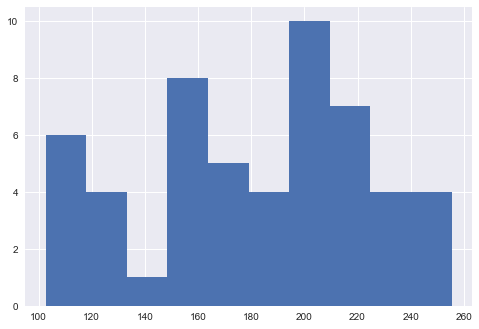

In [70]:
plt.hist(df_lm_y3['pwr'])
plt.show()

In [71]:
len(df_lm_x3)==len(df_lm_y3)

True

In [72]:
train2 = round(len(df_lm_x3)*0.7)
train2
test2 = len(df_lm_x3)-train2
test2

16

In [73]:
X_train3 = df_lm_x3[:train2]
X_test3 = df_lm_x3[test2:]

In [74]:
Y_train3 = df_lm_y3[:train2]
Y_test3 = df_lm_y3[test2:]

In [75]:
# Create linear regression object
regr3 = linear_model.LinearRegression()

# Train the model using the training sets
regr3.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
# Make predictions using the testing set
Y_pred3 = regr3.predict(X_test3)

In [77]:
# The coefficients
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test3, Y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test3, Y_pred3))



Coefficients: 
 [[ 0.00108979 -0.02114762  0.00907436]]
Mean squared error: 1076.69
Variance score: 0.36


In [78]:
results = pd.DataFrame(X_test3)

In [79]:
 results['Y_test'] = Y_test3

In [80]:
 results['Y_pred'] = Y_pred3

In [81]:
results['dif'] = results['Y_test']-results['Y_pred']

(array([  2.,   2.,   7.,   3.,  10.,   8.,   2.,   2.,   0.,   1.]),
 array([-60.70628261, -45.10408355, -29.50188448, -13.89968541,
          1.70251366,  17.30471273,  32.9069118 ,  48.50911087,
         64.11130993,  79.713509  ,  95.31570807]),
 <a list of 10 Patch objects>)

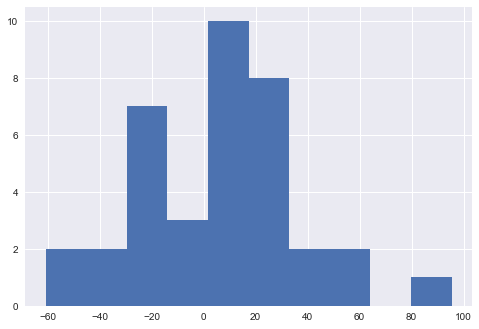

In [82]:
plt.hist(results['dif'])